# learnable parameter

In [74]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt   
import numpy as np

https://discuss.pytorch.org/t/best-way-to-define-a-scalar-using-nn-parameter-in-pytorch/97209   
https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html

In [75]:
class module_scalar(nn.Module):
    def __init__(self):
        super().__init__()
        #self.alpha = nn.Parameter(torch.ones(1))
        self.alpha = nn.Parameter(torch.tensor(0.5))
    def forward(self,x):
        return x*self.alpha
    
    def value(self) :
        return self.alpha.data

0 : 0.08354  | 0.6000000238418579
10 : 0.01381  | 1.2046583890914917
20 : 0.0009454  | 0.9243225455284119
30 : 0.0001473  | 0.9983808994293213
40 : 0.000414  | 1.0244287252426147
50 : 0.0002494  | 0.9772980213165283
60 : 0.0001  | 1.0156705379486084
70 : 3.545e-05  | 0.9902165532112122
80 : 1.255e-05  | 1.0059093236923218
90 : 4.595e-06  | 0.9964876770973206


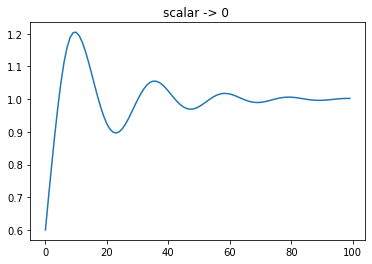

In [77]:

x = torch.rand(30,40)
#t = torch.zeros(30,40)
t = 1*x

m = module_scalar()
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(m.parameters(),lr=0.1)

m.train()

n_iter = 100

val = np.zeros(n_iter)
for i in range(n_iter) : 
    y = m(x)
    loss = criterion(y,t)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    val[i]=(m.value().numpy())
    #print(val[-1])
    if i % 10 == 0 :
        print("{} : {:.4}  | {}".format(i,loss,m.value()))
        
plt.figure()
plt.title("scalar -> 0 ")
plt.plot(val[:])